# 1. Image analysis on Satellite data & Predict the rate of deforestation

## 1.1 Install dependencies

In [1]:
# !pip install numpy
# !pip install matplotlib
# !pip install opencv-python

## 1.2 Import dependencies

In [2]:
# Import standard dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from keras.models import Model, Sequential
from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from keras.preprocessing.image import load_img, save_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image

## 1.3 Create Folder Structures

In [ ]:
#set paths
Train = os.path.join('Data', 'Train')
Validate=os.path.join('Data', 'Validation')
#Test=

In [ ]:
Train

In [ ]:
#make directories
os.makedirs(Train)
os.makedirs(Validate)

# 2. Collect Training Dataset

## 2.1 Amazon Satellite images

In [ ]:
# https://www.kaggle.com/datasets/prosperchuks/amazonsatelliteimages?select=train-jpg

In [ ]:
# Uncompress the training data

#import shutil
#shutil.make_archive('a', 'zip', 'train-jpg')

from zipfile import ZipFile
ex = ZipFile('train-jpg.zip', 'r')
ex.extractall('Data/Train')
ex.close()

In [4]:
from PIL import Image
File = 'Data\\Train\\train_1.jpg'
img = Image.open(File)
print(img.width, img.height)

256 256


In [5]:
File1= 'Data\\Validation\\train_24.jpg'
img1 = Image.open(File1)
print(img1.width, img1.height)

256 256


## 2.2 Create Labelled Dataset

In [6]:
c =len(os.listdir('Data\\Train'))

In [7]:
c

3600

In [8]:
def pixels_from_path(file_path):
    im = Image.open(file_path)
    np_im = np.array(im)
    #matrix of pixel RGB values
    return np_im

In [9]:
import glob
from random import randint
y1=1
sample_size = len(os.listdir('Data\\Train'))
#n1 = randint(0, sample_size)
train_img_set = np.asarray([pixels_from_path(Train) for Train in glob.glob('Data\\Train\\*')[:sample_size]])
train_label = np.asarray([y1+x1 for x1 in range(sample_size)])
print(train_label.shape)

(3600,)


In [10]:
train_label

array([   1,    2,    3, ..., 3598, 3599, 3600])

In [11]:
y=1
valid_size = len(os.listdir('Data\\Validation'))
#n = randint(0, valid_size)
valid_img_set = np.asarray([pixels_from_path(Validation) for Validation in glob.glob('Data\\Validation\\*')[:valid_size]])
valid_label = np.asarray([y+x for x in range(valid_size)])
print(valid_label.shape)

(500,)


In [12]:
valid_label

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [13]:
valid_img_set.shape

(500, 256, 256, 4)

In [14]:
train_img_set.shape

(3600, 256, 256, 4)

# 3. Model Engineering

## 3.1 Build Custome Model 

In [15]:
def load_custom_model():
    model = Sequential()
    model.add(Convolution2D(64, (3, 3), activation='relu',input_shape=(256, 256, 4)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.25))

    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.25))

    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.25))

    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Activation('softmax'))

    x = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

    return x

In [16]:
model = load_custom_model()

# 4. Training

## 4.1 Setup Loss and Optimizer

In [17]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 256, 256, 4)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 254, 254, 64)      2368      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 122, 122, 128)     147584

In [19]:
epoch=3
history = model.fit(np.array(train_img_set),
                    np.array(train_label),
                    shuffle=True,
                    epochs=3,
                    validation_data=(np.array(valid_img_set),np.array(valid_label))
                   )

Epoch 1/3
113/113 [==============================] - 1419s 13s/step - loss: 13.4092 - accuracy: 0.0000e+00 - val_loss: 11.2081 - val_accuracy: 0.0020
Epoch 2/3
113/113 [==============================] - 1290s 11s/step - loss: 11.2127 - accuracy: 3.2888e-04 - val_loss: 11.2081 - val_accuracy: 0.0020
Epoch 3/3
113/113 [==============================] - 1260s 11s/step - loss: 11.2104 - accuracy: 0.0000e+00 - val_loss: 11.2081 - val_accuracy: 0.0020


# 5. Build Model From IEEE website

#### from https://ieeexplore.ieee.org/document/8121895

In [20]:
def load_IEEE_model():
    model1 = Sequential()
    model1.add(Convolution2D(64, (3, 3), activation='relu',input_shape=(256, 256, 4)))
    model1.add(Convolution2D(64, (3, 3), activation='relu'))
    model1.add(MaxPooling2D((2,2)))
    model1.add(Dropout(0.25))

    model1.add(Convolution2D(128, (3, 3), activation='relu'))
    model1.add(Convolution2D(128, (3, 3), activation='relu'))
    model1.add(MaxPooling2D((2,2)))
    model1.add(Dropout(0.25))

    model1.add(Convolution2D(256, (3, 3), activation='relu'))
    model1.add(Convolution2D(256, (3, 3), activation='relu'))
    model1.add(MaxPooling2D((2,2)))
    model1.add(Dropout(0.25))

    model1.add(Convolution2D(512, (3, 3), activation='relu'))
    model1.add(Convolution2D(512, (3, 3), activation='relu'))
    model1.add(MaxPooling2D((2,2)))
    model1.add(Dropout(0.5))
    model1.add(BatchNormalization())

    model1.add(Flatten())
    model1.add(Activation('sigmoid'))

    x = Model(inputs=model1.layers[0].input, outputs=model1.layers[-2].output)

    return x

In [21]:
model1 = load_IEEE_model()

## 5.1 Setup Loss and Optimizer

In [22]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
model1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8_input (InputLayer)  [(None, 256, 256, 4)]     0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 254, 254, 64)      2368      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 252, 252, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 126, 126, 64)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 124, 124, 128)     73856     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 122, 122, 128)     1475

In [24]:
epoch=3
history_ieee = model1.fit(np.array(train_img_set),
                    np.array(train_label),
                    shuffle=True,
                    epochs=3,
                    validation_data=(np.array(valid_img_set),np.array(valid_label))
                   )

Epoch 1/3
113/113 [==============================] - 1310s 12s/step - loss: 6454.7358 - accuracy: 0.0000e+00 - val_loss: -2352.3625 - val_accuracy: 0.0000e+00
Epoch 2/3
113/113 [==============================] - 1272s 11s/step - loss: 4521.1760 - accuracy: 9.6620e-05 - val_loss: 864.4354 - val_accuracy: 0.0000e+00
Epoch 3/3
113/113 [==============================] - 2659s 24s/step - loss: 3664.9801 - accuracy: 0.0000e+00 - val_loss: -967.3395 - val_accuracy: 0.0000e+00


# 6. Save Both Models

In [25]:
model.save('custom_model.h5')

In [26]:
model1.save('model_IEEE.h5')

# 7. Data Visualization

## 7.1 Display Training History for "Custom Model"

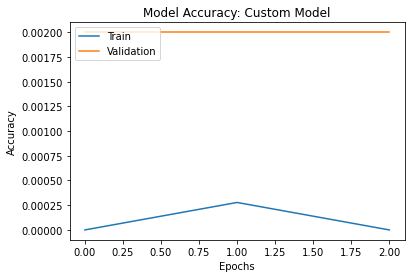

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy: Custom Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## 7.2 Display Training History for "IEEE Model"

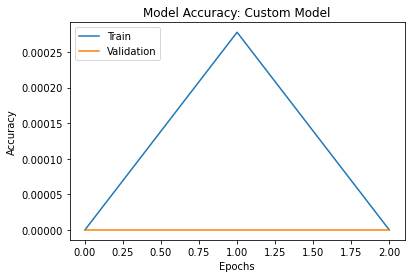

In [43]:
plt.plot(history_ieee.history['accuracy'])
plt.plot(history_ieee.history['val_accuracy'])
plt.title('Model Accuracy: Custom Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## 7.3 Display Loss History "Custom Model"

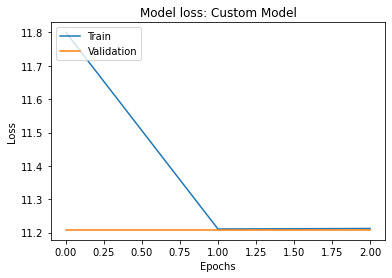

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss: Custom Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## 7.4 Display Loss History "IEEE Model"

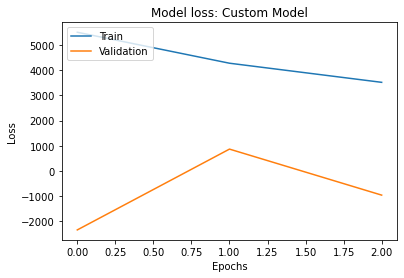

In [45]:
plt.plot(history_ieee.history['loss'])
plt.plot(history_ieee.history['val_loss'])
plt.title('Model loss: Custom Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 8. Prediction

## 8.1 For Custom Model

In [28]:
img_t = np.array(Image.open("Data\\Train\\train_3.jpg").resize((256, 256)))
image_list=[]
image_list.append(np.array(img_t))
x11=np.asarray(image_list)
#print("shape:", img_t.shape)
prediction = model.predict(x11).round()

In [36]:
print("shape:", img_t.shape)

shape: (256, 256, 4)


In [37]:
img_t

array([[[203, 192, 205,   0],
        [201, 191, 205,   0],
        [202, 190, 204,   0],
        ...,
        [196, 182, 199,   0],
        [201, 186, 197,   0],
        [207, 191, 197,   0]],

       [[203, 191, 205,   0],
        [200, 190, 205,   0],
        [201, 189, 204,   0],
        ...,
        [197, 181, 200,   0],
        [202, 185, 198,   0],
        [208, 190, 198,   0]],

       [[205, 190, 207,   0],
        [203, 190, 206,   0],
        [203, 189, 205,   0],
        ...,
        [198, 182, 200,   0],
        [203, 185, 199,   0],
        [208, 189, 200,   0]],

       ...,

       [[208, 193, 203,   0],
        [209, 197, 202,   0],
        [209, 199, 201,   0],
        ...,
        [198, 181, 193,   0],
        [198, 185, 194,   0],
        [198, 188, 195,   0]],

       [[211, 198, 203,   0],
        [211, 197, 202,   0],
        [210, 196, 201,   0],
        ...,
        [200, 183, 193,   0],
        [199, 186, 194,   0],
        [199, 189, 196,   0]],

       [[212

In [29]:
prediction

array([[-0., -0., -0., ..., -0., -0., -0.]], dtype=float32)

In [30]:
prediction.shape

(1, 73728)

In [51]:
np.size(img_t)

262144

## 8.2 For IEEE Model

In [33]:
img_train = np.array(Image.open("Data\\Train\\train_3.jpg").resize((256, 256)))
image_list1=[]
image_list1.append(np.array(img_train))
x12=np.asarray(image_list1)
#print("shape:", img_t.shape)
prediction_train = model1.predict(x12).round()

In [34]:
prediction_train

array([[1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

In [35]:
prediction_train.shape

(1, 73728)

# Thank you